In [1]:
# import lib
import numpy
import pandas
from sklearn.linear_model import LinearRegression

In [2]:
csv_file = "./TESLA_STOCK_2010_2020.csv"
# Read the excel file to a dataframe
df = pandas.read_csv(csv_file)
# comment:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [3]:
df['Date'] = pandas.to_datetime(df['Date'])
df.set_index('Date', inplace=True, verify_integrity=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [4]:
# view dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [5]:
# check if two columns Close and Adj Close is the same
(df['Close'] == df['Adj Close']).all()

True

In [6]:
# drop redudant column Adj Close
df.drop('Adj Close', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Close   2416 non-null   float64
 4   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 113.2 KB


In [8]:
# X is data used to predict Y
# X_train , and Y_train is used to training model
# to predict, use X_test data to predict Y (Y_predict), Y_test is the real result

# by using historical price of stock, the tomorrow open price of stock will be predicted

X_col = ['Open', 'High', 'Low', 'Close', 'Volume'] 
# X is historical price
X = df[X_col]
# convert datetime[ns] to timestamp unit'D'
X['Timestamp'] = [x.value / 86400000000000 for x in df.index] # 10**9 * 60 * 60 *24
# pandas.to_datetime(14780, unit='D', origin='unix')
Y = df['Open'].iloc[1:]

In [9]:
# demo for predict

# step = 15
# model = LinearRegression()

# X_train = X.iloc[0: 15] (0, 1, 2, ..., 14)
# Y_train = Y.iloc[0: 15] (0, 1, 2, ..., 14)

# model.fit(X_train, Y_train)

# X_test = X.iloc[15].to_numpy().reshape(1, -1) (df.i = 15)
# Y_test = Y.iloc[15] = df.iloc[15, ]
# predict_demo = model.predict(X_test)

In [10]:
def predict_tomorrow_open_price(model, X_train, Y_train, X_test):
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    return Y_predict

In [11]:
step = 15

model = LinearRegression()

Open_Tomorrow_Predict = []

for i in range(step, len(df)):
    i_first = i - step
    X_train = X.iloc[i - step: i]
    Y_train = Y.iloc[i - step: i]
    
    # if (i_last == len(df)):
    #     i_last =- 1

    X_test = X.iloc[i].to_numpy().reshape(1, -1)

    Y_Predict = predict_tomorrow_open_price(\
        model, X_train, Y_train, X_test)[0]
    Open_Tomorrow_Predict.append(Y_Predict)


In [12]:
# Open_Predict = [0 for i in range(step + 1)] + Open_Tomorrow_Predict[:-1]
Open_Tomorrow_Predict = [None for i in range(step)] + Open_Tomorrow_Predict
Open_Predict = [None]+ Open_Tomorrow_Predict[:-1]

In [13]:
# Create new column Open_Tomorrow_Real
df['Open_Tomorrow_Predict'] = Open_Tomorrow_Predict
df['Open_Predict']  = Open_Predict
df['Open_Tomorrow_Real'] = df['Open'].shift(-1)
df['Loss'] = df['Open_Predict'] - df['Open']

In [14]:
# testing
df['NO'] = [i for i in range(len(df))]
df[:20]

,Open,High,Low,Close,Volume,Open_Tomorrow_Predict,Open_Predict,Open_Tomorrow_Real,Loss,NO
Date,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,NaN,NaN,25.790001,NaN,0
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,NaN,NaN,25.000000,NaN,1
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,NaN,NaN,23.000000,NaN,2
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,NaN,NaN,20.000000,NaN,3
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,NaN,NaN,16.400000,NaN,4
2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700,NaN,NaN,16.139999,NaN,5
2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400,NaN,NaN,17.580000,NaN,6
2010-07-09,17.580000,17.900000,16.549999,17.400000,4050600,NaN,NaN,17.950001,NaN,7
2010-07-12,17.950001,18.070000,17.000000,17.049999,2202500,NaN,NaN,17.389999,NaN,8


In [15]:
df[-20:]


,Open,High,Low,Close,Volume,Open_Tomorrow_Predict,Open_Predict,Open_Tomorrow_Real,Loss,NO
Date,,,,,,,,,,
2020-01-06,440.470001,451.559998,440.000000,451.540009,10133000,459.392054,438.847595,461.399994,-1.622406,2396
2020-01-07,461.399994,471.630005,453.359985,469.059998,17882100,470.196687,459.392054,473.700012,-2.007940,2397
2020-01-08,473.700012,498.489990,468.230011,492.140015,31144300,486.708053,470.196687,497.100006,-3.503325,2398
2020-01-09,497.100006,498.799988,472.869995,481.339996,28440400,473.790292,486.708053,481.790009,-10.391953,2399
2020-01-10,481.790009,484.940002,473.700012,478.149994,12959500,479.156635,473.790292,493.500000,-7.999717,2400
2020-01-13,493.500000,525.630005,492.000000,524.859985,26517600,529.889795,479.156635,544.260010,-14.343365,2401
2020-01-14,544.260010,547.409973,524.900024,537.919983,28996200,551.140990,529.889795,529.760010,-14.370215,2402
2020-01-15,529.760010,537.840027,516.789978,518.500000,17368800,525.083188,551.140990,493.750000,21.380980,2403
2020-01-16,493.750000,514.460022,492.170013,513.489990,21736700,529.388747,525.083188,507.609985,31.333188,2404


In [16]:
df.drop('NO', axis=1, inplace=True)

<AxesSubplot:xlabel='Date'>

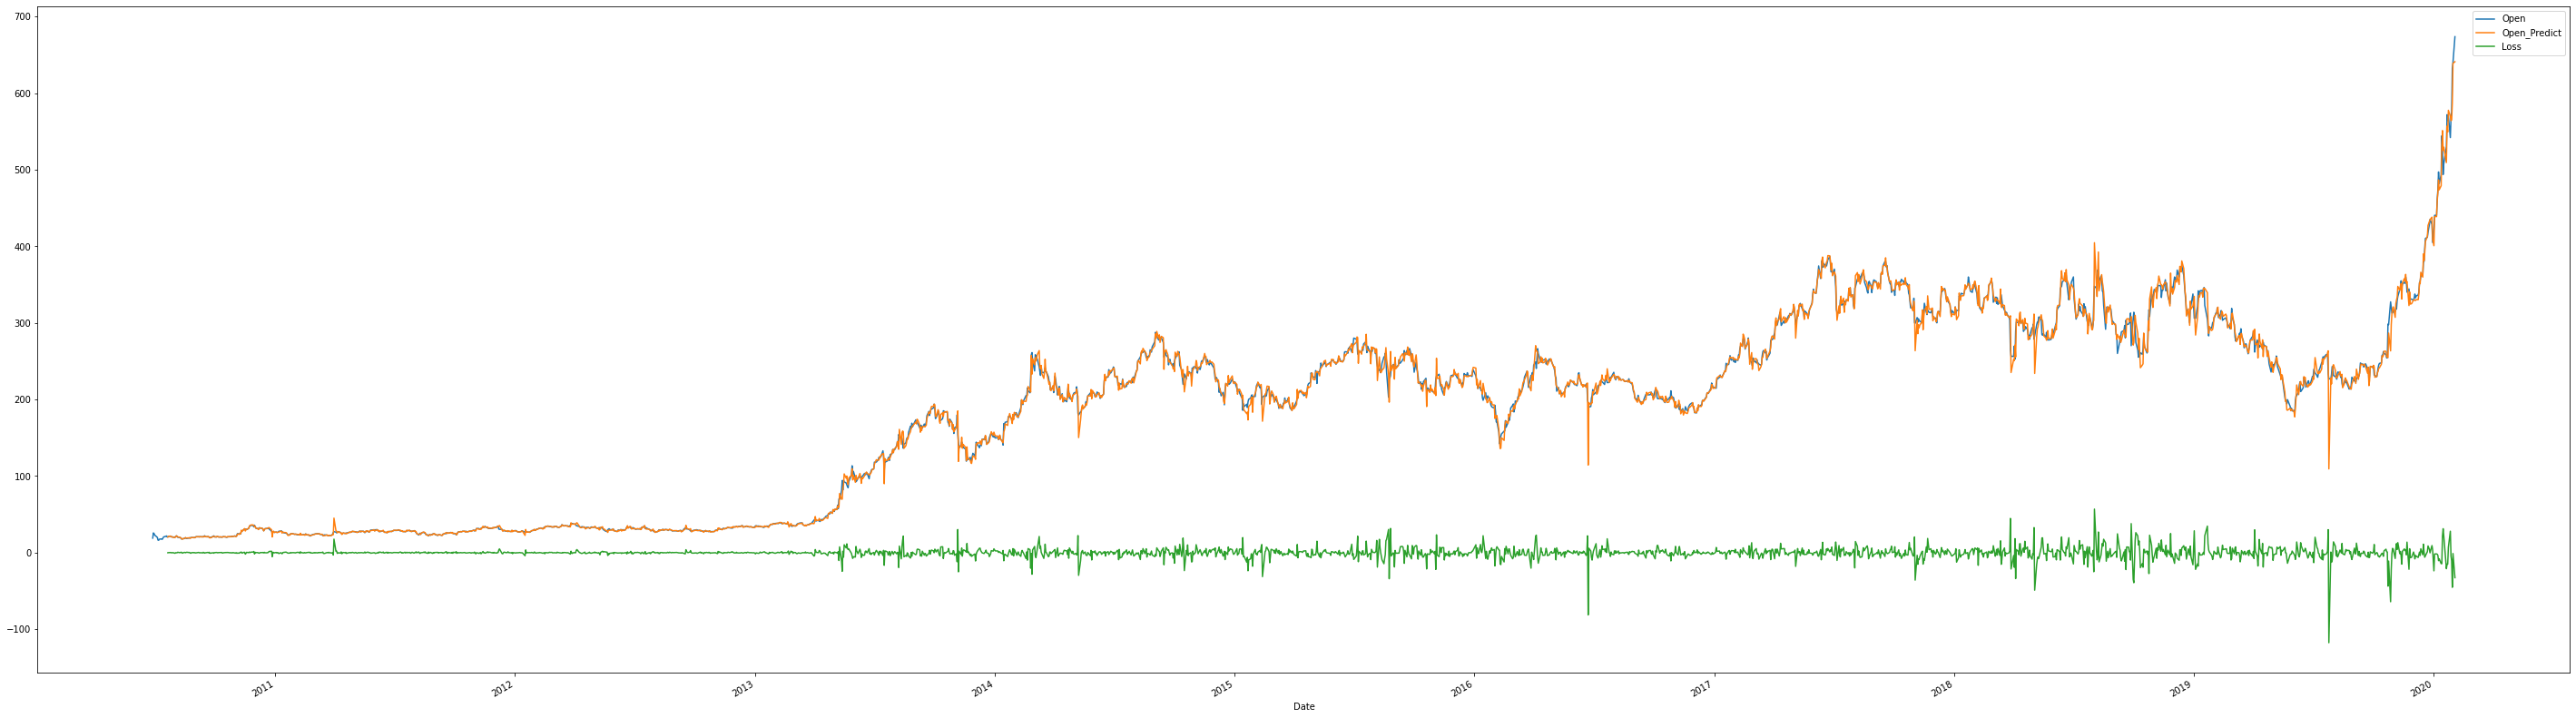

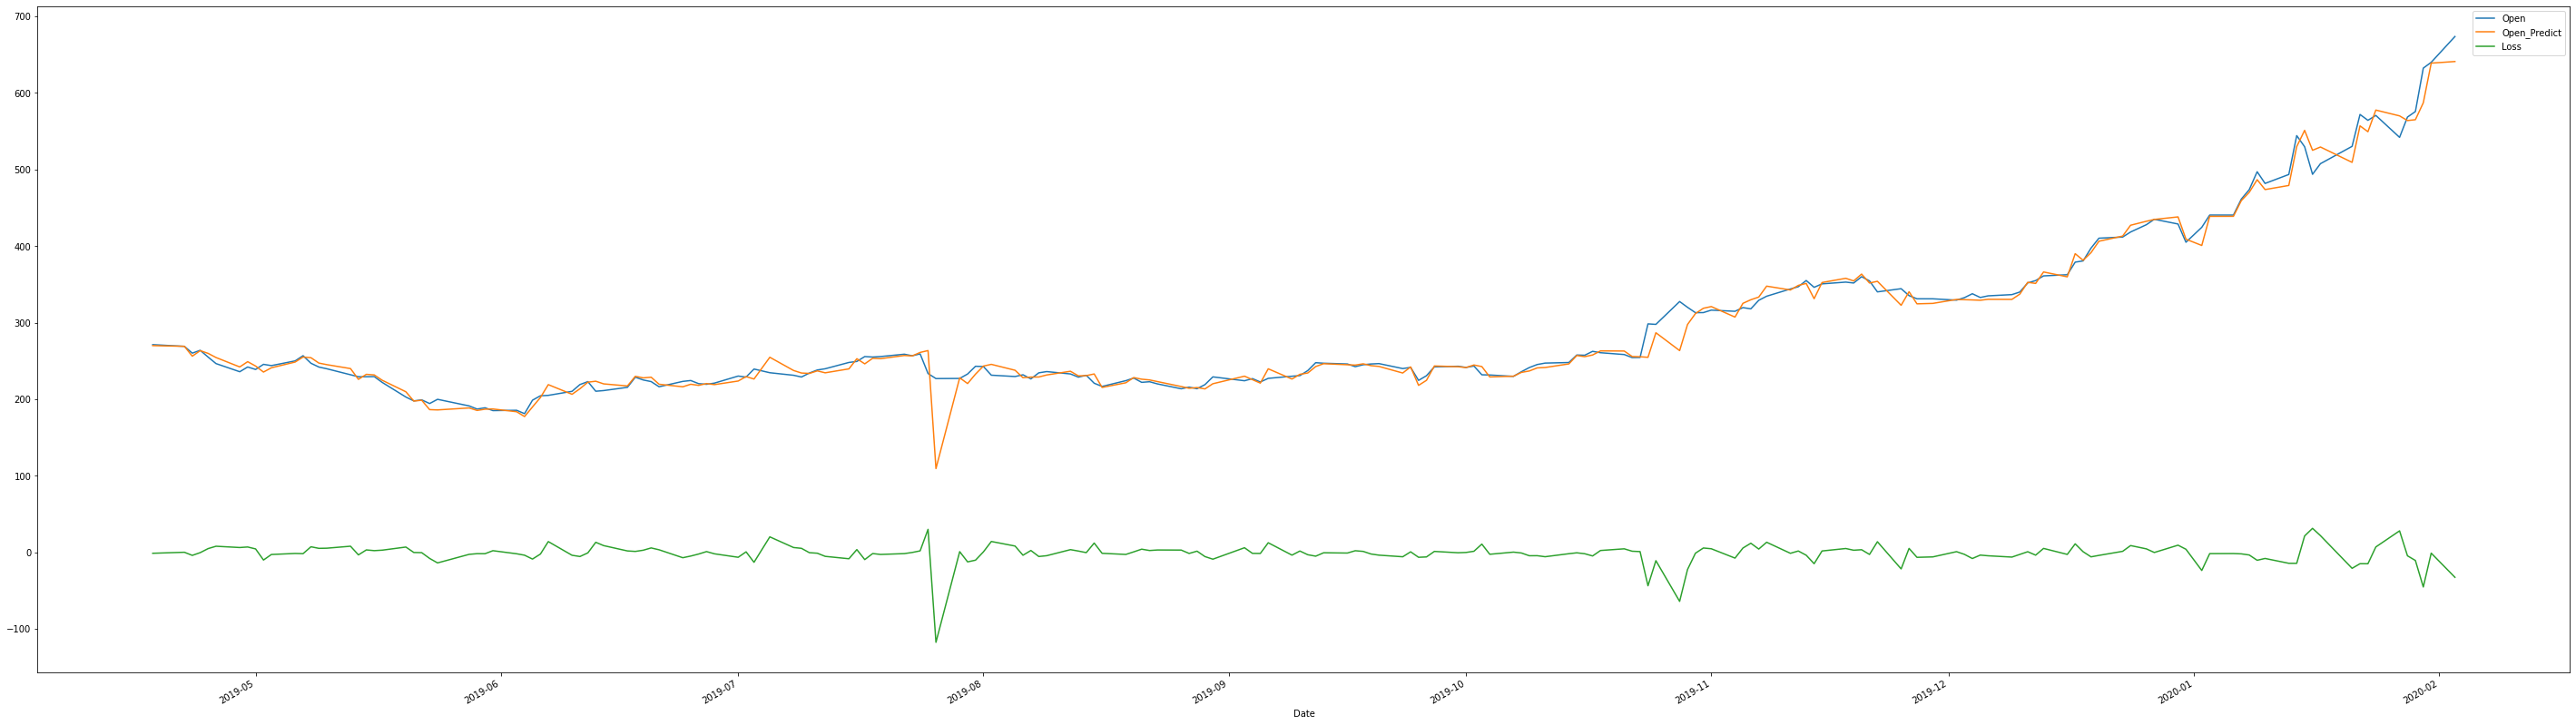

In [17]:
df.plot(y=['Open', 'Open_Predict', 'Loss'], figsize=(50,15))
df.iloc[-200:].plot(y=['Open', 'Open_Predict', 'Loss'], figsize=(50,15))

In [18]:
df.to_csv('.\predicted.' + csv_file[2:])